In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv('kyphosis.csv')

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


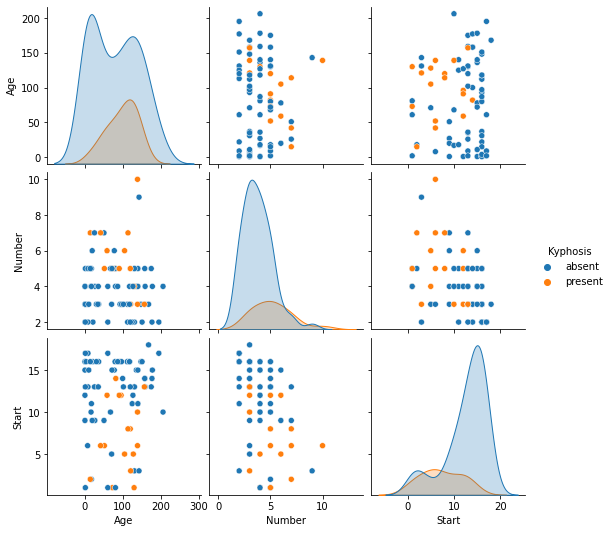

In [6]:
sns.pairplot(df,hue='Kyphosis')

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree=DecisionTreeClassifier()

In [19]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
predictions=dtree.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[19  2]
 [ 2  2]]
              precision    recall  f1-score   support

      absent       0.90      0.90      0.90        21
     present       0.50      0.50      0.50         4

    accuracy                           0.84        25
   macro avg       0.70      0.70      0.70        25
weighted avg       0.84      0.84      0.84        25



In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc=RandomForestClassifier(n_estimators=200)

In [33]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [34]:
rfc_pred=rfc.predict(X_test)

In [35]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[20  1]
 [ 2  2]]
              precision    recall  f1-score   support

      absent       0.91      0.95      0.93        21
     present       0.67      0.50      0.57         4

    accuracy                           0.88        25
   macro avg       0.79      0.73      0.75        25
weighted avg       0.87      0.88      0.87        25



In [54]:
loans=pd.read_csv('loan_data.csv')

In [55]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


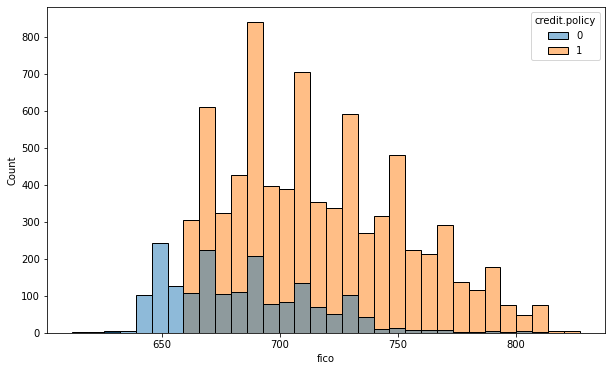

In [57]:
plt.figure(figsize=(10,6))
sns.histplot(x='fico',hue='credit.policy',data=loans,bins=32)

Text(0.5, 0, 'FICO')

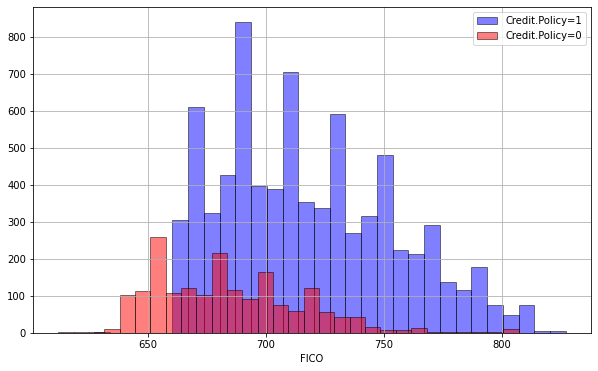

In [60]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,
                                              color='blue',
                                              bins=30,
                                              label='Credit.Policy=1',
                                              edgecolor='black')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,
                                              color='red',
                                              bins=30,
                                              label='Credit.Policy=0',
                                              edgecolor='black')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

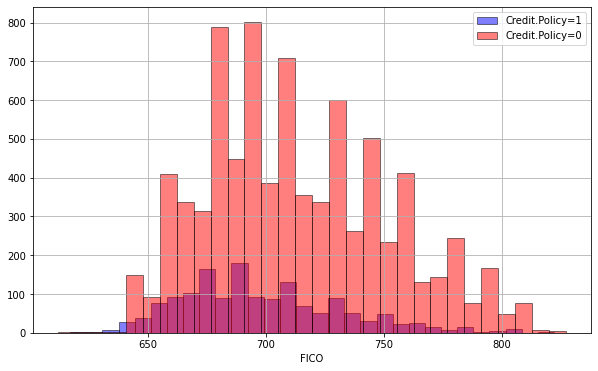

In [68]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,
                                              color='blue',
                                              bins=30,
                                              label='Credit.Policy=1',
                                              edgecolor='black')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,
                                              color='red',
                                              bins=30,
                                              label='Credit.Policy=0',
                                              edgecolor='black')
plt.legend()
plt.xlabel('FICO')

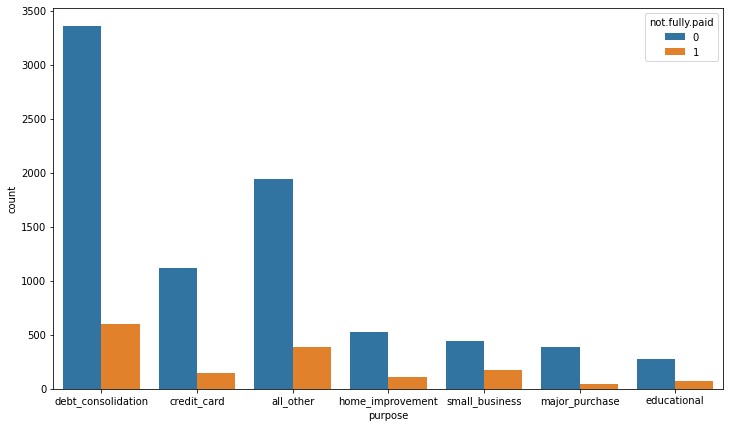

In [74]:
plt.figure(figsize=(12,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans)


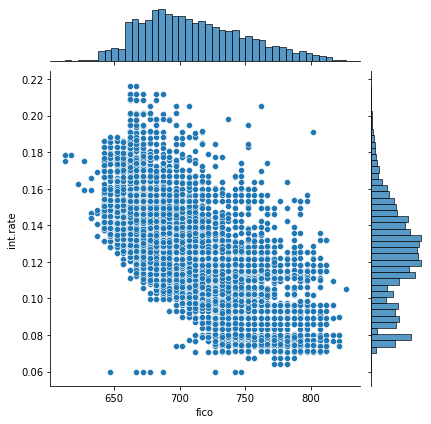

In [76]:
sns.jointplot(x='fico',y='int.rate',data=loans)

<Figure size 792x504 with 0 Axes>

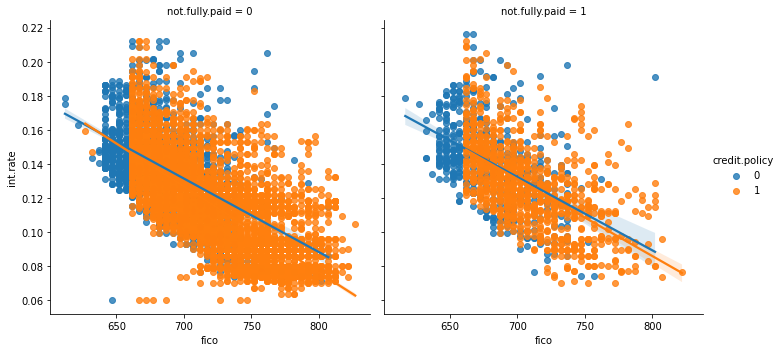

In [80]:
plt.figure(figsize=(11,7))
sns.lmplot(x='fico',
           y='int.rate',
           data=loans,
           hue='credit.policy',
           col='not.fully.paid')

In [81]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [82]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [96]:
final_data=pd.get_dummies(loans,columns=['purpose'],drop_first=True)

In [98]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [103]:
X=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [109]:
dec_tree=DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
preds=dec_tree.predict(X_test)

In [110]:
print(confusion_matrix(preds,y_test))
print(classification_report(preds,y_test))

[[2002  345]
 [ 429   98]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      2347
           1       0.22      0.19      0.20       527

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.71      0.73      0.72      2874



In [111]:
rand_for=RandomForestClassifier(n_estimators=600)

In [113]:
rand_for.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [115]:
preds=rand_for.predict(X_test)

In [117]:
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[2424    7]
 [ 433   10]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.59      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.72      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874

